# A Pseudoproxy Experiment with GraphEM and pseudoPAGES2k

**Expected time to run through: 30 mins**

This tutorial demonstrates how to get a reconstruction using GraphEM, leveraging a simple pseudoproxy dataset generated from iCESM gridded, with the realistic spatial availability but full temporal avaiablity of the PAGES2kv2 dataset.
The pseudoproxy are generated based on the original iCESM simulated `tas` plus white noise with `SNR=10`, using below code block:

## Test data preparation

To go through this tutorial, please prepare test data following the steps:

Download the test case named “PPE_PAGES2k” with this [link](https://drive.google.com/drive/folders/1_h6o_gDR6xLX50c_Ad-lzRoWwHlAgBnK?usp=sharing).
Create a directory named “testcases” in the same directory where this notebook sits.
Put the unzipped direcotry “PPE_PAGES2k” into “testcases”.

Below, we first load some useful packages, including our `GraphEM`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import numpy as np
import pandas as pd

## Reconstruction

In [2]:
job = GraphEM.ReconJob()

In [3]:
job.load_configs('./testcases/PPE_PAGES2k/configs.yml', verbose=True)

GraphEM: job.load_configs() >>> loading reconstruction configurations from: ./testcases/PPE_PAGES2k/configs.yml
GraphEM: job.load_configs() >>> job.configs created
GraphEM: job.load_configs() >>> job.configs["job_dirpath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon
GraphEM: job.load_configs() >>> /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon created
{'anom_period': [1951, 1980],
 'calib_period': [1900, 2000],
 'job_dirpath': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon',
 'job_id': 'GraphEM_tutorial',
 'obs_path': {'tas': './data/obs/iCESM_ann.nc'},
 'obs_regrid_ntrunc': 21,
 'obs_varname': {'lat': 'lat', 'lon': 'lon', 'tas': 'tas'},
 'proxydb_path': './data/proxy/pseudoPAGES2k_dataset_tas_wn_SNR10_full_temporal_availability.pkl',
 'ptype_list': 'all',
 'recon_period': [1000, 2000]}


In [4]:
job.load_proxydb(verbose=True)

GraphEM: job.load_proxydb() >>> job.configs["proxydb_path"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/data/proxy/pseudoPAGES2k_dataset_tas_wn_SNR10_full_temporal_availability.pkl
GraphEM: job.load_proxydb() >>> 692 records loaded
GraphEM: job.load_proxydb() >>> job.proxydb created


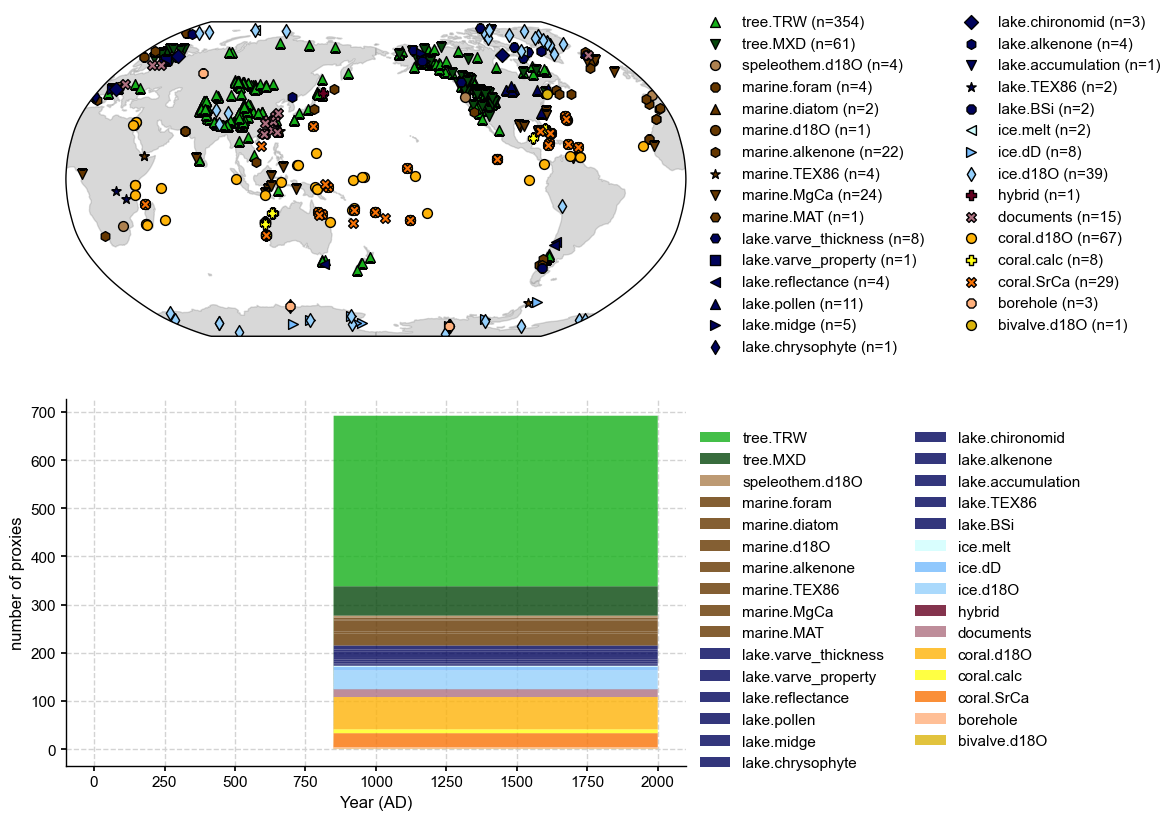

In [5]:
fig, ax = job.proxydb.plot()

In [6]:
job.load_obs(verbose=True)
print(job.obs)

GraphEM: job.load_obs() >>> loading instrumental observation fields from: {'tas': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/data/obs/iCESM_ann.nc'}
GraphEM: job.load_obs() >>> job.obs created
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/data/obs/iCESM_ann.nc
    Shape:  time:1156, lat:96, lon:144


In [7]:
# regrid obs to make the problem size smaller
job.regrid_obs(verbose=True)

LMRt: job.regrid_obs() >>> regridded obs
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/data/obs/iCESM_ann.nc
    Shape:  time:1156, lat:22, lon:33
LMRt: job.regrid_obs() >>> job.obs updated


Since the loaded iCESM simulation and the pseudoproxy dataset are already annualized, we can skip the `.seasonalize()` steps and run `.prep_data()` directly.

In [8]:
job.prep_data(verbose=True)

GraphEM: job.prep_data() >>> job.recon_time created
GraphEM: job.prep_data() >>> job.calib_time created
GraphEM: job.prep_data() >>> job.calib_idx created
GraphEM: job.prep_data() >>> job.temp created
GraphEM: job.prep_data() >>> job.df_proxy created
GraphEM: job.prep_data() >>> job.proxy created
GraphEM: job.prep_data() >>> job.lonlat created


In [9]:
job.df_proxy

,NAm_153,Asi_245,NAm_165,Asi_178,Asi_174,Eur_016,Asi_198,NAm_145,Arc_070,Arc_071,...,Asi_119,Ocn_153,NAm_074,Asi_026,Ocn_169,Asi_201,Asi_179,Arc_014,Ocn_071,Ocn_072
1000.0,2.049447,1.206348,-0.028154,0.354423,0.164291,0.700894,0.420136,1.610386,1.250028,1.241505,...,0.828330,0.074526,1.969163,0.165617,0.331053,-0.578854,0.188152,1.255906,0.304311,0.425676
1001.0,0.014990,0.708525,0.246777,-0.057988,-0.127694,-0.077910,0.477898,-1.579350,-1.453855,1.689047,...,0.986828,-0.319637,1.589055,0.146957,-0.345228,-0.449773,0.128710,1.697772,-0.457480,-0.352040
1002.0,-1.114598,-0.355595,-0.903415,-0.370463,-0.170471,0.018887,0.820904,0.335598,0.658790,-1.006825,...,-0.571258,-0.268028,-2.308910,0.313561,-0.265528,-0.357028,0.152346,-0.037280,-0.357438,-0.312209
1003.0,0.921028,0.761262,-0.241008,-0.612394,-0.198821,0.600541,0.038012,1.649567,0.484537,-0.694430,...,0.332292,0.469818,1.270690,-0.172501,0.210101,-0.619913,-0.157362,-0.393430,0.248620,0.292726
1004.0,0.292958,-0.005126,0.781568,-0.169216,0.314034,-0.194410,0.990756,-0.391326,-1.263733,1.176845,...,0.160528,-0.084175,0.971972,0.342813,-0.134291,1.254460,0.379938,1.061491,-0.126194,-0.164533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996.0,0.596161,0.397911,-0.213472,-0.375964,0.110367,-0.175807,1.092398,2.554041,2.983670,-0.233084,...,0.086505,0.938570,-0.516218,0.099238,0.489292,0.470537,-0.122144,-0.671030,0.416049,0.440858
1997.0,0.708165,-0.204674,0.940863,-0.811482,-0.402413,0.229789,1.386490,0.106067,-0.278486,-0.677213,...,-0.236382,0.109457,-0.916285,-0.319777,-0.009780,0.513189,-0.707492,-1.106939,-0.174881,-0.218647
1998.0,0.502749,-0.240407,1.346490,0.595868,0.373318,0.085835,0.838359,0.328611,1.795783,2.179380,...,-0.454328,0.489631,0.177895,0.388473,0.009699,0.821627,0.307725,1.840054,-0.005446,0.060198
1999.0,1.476074,-0.101115,0.071156,0.010010,0.215712,-0.452304,-0.450495,2.144862,1.877791,-0.456210,...,0.340616,0.543951,0.590506,0.229498,0.373771,0.036311,-0.097946,-0.597891,0.509028,0.404405


In [10]:
print(np.shape(job.temp))
print(np.shape(job.proxy))
print(np.shape(job.lonlat))

(1001, 726)
(1001, 692)
(1418, 2)


In [11]:
job.save(verbose=True)

LMRt: job.save_job() >>> Prepration data saved to: /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon/job.pkl
LMRt: job.save_job() >>> job.configs["prep_savepath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon/job.pkl


In [12]:
%%time

# need to remove G.pkl if the previous run is problematic
save_path = './testcases/PPE_PAGES2k/recon/G.pkl'
job.run_solver(save_path=save_path, verbose=True, distance=5e3)

Estimating graph using neighborhood method
Running GraphEM:

Iter     dXmis     rdXmis

001     0.0876     0.6708
002     0.4915     3.0970
003     0.1681     0.3053
004     0.1048     0.1687
005     0.0731     0.1107
006     0.0542     0.0788
007     0.0430     0.0606
008     0.0344     0.0474
009     0.0292     0.0395
010     0.0256     0.0341
011     0.0229     0.0300
012     0.0208     0.0270
013     0.0191     0.0245
014     0.0178     0.0226
015     0.0167     0.0210
016     0.0157     0.0197
017     0.0150     0.0186
018     0.0183     0.0226
019     0.0150     0.0184
020     0.0137     0.0167
021     0.0129     0.0157
022     0.0123     0.0149
023     0.0118     0.0142
024     0.0114     0.0137
025     0.0110     0.0132
026     0.0106     0.0127
027     0.0103     0.0123
028     0.0101     0.0120
029     0.0098     0.0116
030     0.0096     0.0113
031     0.0094     0.0110
032     0.0092     0.0108
033     0.0090     0.0105
034     0.0088     0.0103
035     0.0086     0.0101
03

In [13]:
job.save_recon('./testcases/PPE_PAGES2k/recon/recon.nc', verbose=True)

LMRt: job.save_recon() >>> Reconstruction saved to: ./testcases/PPE_PAGES2k/recon/recon.nc


## Validation

In [14]:
with xr.open_dataset('./testcases/PPE_PAGES2k/recon/recon.nc') as ds:
    print(ds)

<xarray.Dataset>
Dimensions:  (lat: 22, lon: 33, year: 1001)
Coordinates:
  * year     (year) int64 1000 1001 1002 1003 1004 ... 1996 1997 1998 1999 2000
  * lat      (lat) float64 -85.91 -77.73 -69.55 -61.36 ... 69.55 77.73 85.91
  * lon      (lon) float64 0.0 10.91 21.82 32.73 ... 316.4 327.3 338.2 349.1
Data variables:
    recon    (year, lat, lon) float64 ...


In [15]:
mask = (job.obs.fields['tas'].time >= 1000) & (job.obs.fields['tas'].time <= 2000)
target = job.obs.fields['tas'].value[mask]
print(np.shape(target))

(1001, 22, 33)


### Mean Statistics

In [16]:
nt = np.size(ds['year'])
temp_r = job.recon.reshape((nt, -1))
V = GraphEM.solver.verif_stats(temp_r, target.reshape((nt, -1)), job.calib_idx)
print(V)

Mean MSE = 0.5291, Mean RE = 0.1882, Mean CE = -0.0223, Mean R2 = 0.3907


### Map of CE

In [17]:
ce = LMRt.utils.coefficient_efficiency(target, ds['recon'])
print(np.shape(ce))

(22, 33)


/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:834: UserWarning: Attempting to set identical left == right == -180.0 results in singular transformations; automatically expanding.
  self.set_xlim([x1, x2])


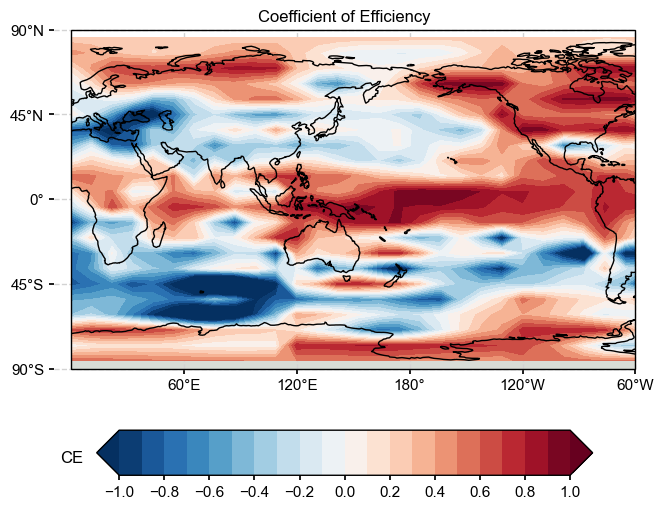

In [18]:
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig = plt.figure(figsize=[8, 8])
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_title('Coefficient of Efficiency')
latlon_range = [0, 360, -90, 90]
transform=ccrs.PlateCarree()

ax.set_extent(latlon_range, crs=transform)
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

lon_ticks=[60, 120, 180, 240, 300]
lat_ticks=[-90, -45, 0, 45, 90]
lon_ticks = np.array(lon_ticks)
lat_ticks = np.array(lat_ticks)
lon_min, lon_max, lat_min, lat_max = latlon_range
mask_lon = (lon_ticks >= lon_min) & (lon_ticks <= lon_max)
mask_lat = (lat_ticks >= lat_min) & (lat_ticks <= lat_max)
ax.set_xticks(lon_ticks[mask_lon], crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks[mask_lat], crs=ccrs.PlateCarree())

levels = np.linspace(-1, 1, 21)
cbar_labels = np.linspace(-1, 1, 11)
cbar_title = 'CE'
extend = 'both'
cmap = 'RdBu_r'
cbar_pad=0.1
cbar_orientation='horizontal'
cbar_aspect=10
cbar_fraction=0.35
cbar_shrink=0.8
font_scale=1.5
land_color=sns.xkcd_rgb['light grey']
ocean_color=sns.xkcd_rgb['white']
        
ax.add_feature(cfeature.LAND, facecolor=land_color, edgecolor=land_color)
ax.add_feature(cfeature.OCEAN, facecolor=ocean_color, edgecolor=ocean_color)
ax.coastlines()
im = ax.contourf(ds['lon'].values, ds['lat'].values, ce, levels, transform=transform, cmap=cmap, extend=extend)
cbar = fig.colorbar(
    im, ax=ax, orientation=cbar_orientation, pad=cbar_pad, aspect=cbar_aspect,
    fraction=cbar_fraction, shrink=cbar_shrink)
cbar.set_ticks(cbar_labels)
cbar.ax.set_title(cbar_title, x=-0.05, y=0.1)
    
LMRt.showfig(fig)

### Mean timeseries

In [19]:
import pyleoclim as pyleo

In [20]:
def geo_mean(field, lat):
    m = np.average(
        np.average(field, axis=-1), axis=-1, weights=np.cos(np.deg2rad(lat))
    )
    return m

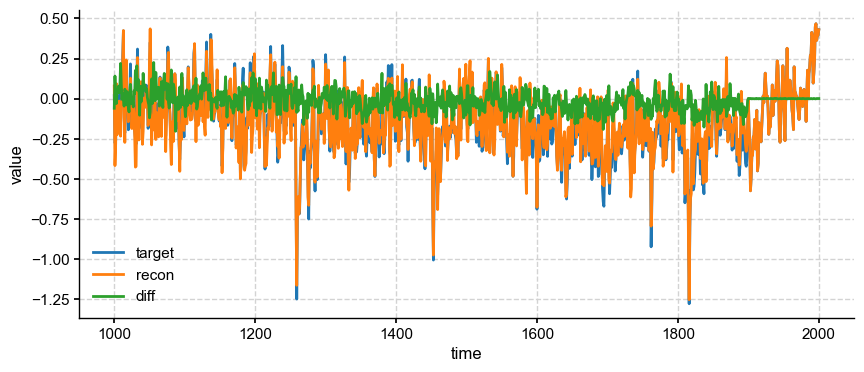

In [21]:
m_target = geo_mean(target, job.obs.fields['tas'].lat) 
ts_target = pyleo.Series(time=np.arange(1000, 2001), value=m_target)

m_recon = geo_mean(ds['recon'].values, ds['lat'].values)
ts_recon = pyleo.Series(time=ds['year'].values, value=m_recon)

fig, ax = ts_target.plot(mute=True, label='target')
ts_recon.plot(ax=ax, label='recon')
ax.plot(ds['year'].values, m_target-m_recon, label='diff')
ax.legend()
pyleo.showfig(fig)